## Week-6 activities

### Task 4. 
- Build a regression model for dataset in `dataset/w5-multi-regression-trainset.xlsx`. Please note it's a multiple linear regression task. **Using scikit-learn library allowed**. Evaluate the model on the provided test set, `dataset/w5-multi-regression-testset.xlsx` in terms of RMSE and R2-score.

In [118]:
import pandas as pd

In [119]:
df = pd.read_excel('datasets/w5-multi-regression-trainset.xlsx',sheet_name='Sheet1')

In [120]:
df.head()

,x1,x2,x3,x4,y
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [121]:
shuffled_data = df.sample(frac=1)
shuffled_data.head()

,x1,x2,x3,x4,y
39,22177.74,154806.14,28334.72,California,65200.33
2,153441.51,101145.55,407934.54,Florida,191050.39
0,165349.20,136897.80,471784.10,New York,192261.83
41,1315.46,115816.21,297114.46,Florida,49490.75
28,55493.95,103057.49,214634.81,Florida,96778.92


In [122]:
# encode the x4 column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_col = encoder.fit_transform(shuffled_data[['x4']])
encoded_col


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [123]:
encoder.categories_

[array(['California', 'Florida', 'New York'], dtype=object)]

In [124]:
encoder_list = []
ohe_df_features = []
ohe_df_feature = pd.DataFrame(encoded_col, columns=list(encoder.categories_[0]))
ohe_df_features.append(ohe_df_feature)
ohe_dataset = pd.concat(ohe_df_features,axis=1)
ohe_dataset.index = shuffled_data.index
#drop the categorical feature columns
shuffled_data = shuffled_data.drop(columns=['x4'] )

#merge rest of the dataset with these new onehot features
shuffled_data = shuffled_data.join(ohe_dataset)
shuffled_data.head()


,x1,x2,x3,y,California,Florida,New York
39,22177.74,154806.14,28334.72,65200.33,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
41,1315.46,115816.21,297114.46,49490.75,0.0,1.0,0.0
28,55493.95,103057.49,214634.81,96778.92,0.0,1.0,0.0


In [125]:
X = shuffled_data[['x1','x2','x3','California', 'Florida', 'New York']]
X

,x1,x2,x3,California,Florida,New York
39,22177.74,154806.14,28334.72,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0
0,165349.20,136897.80,471784.10,0.0,0.0,1.0
41,1315.46,115816.21,297114.46,0.0,1.0,0.0
28,55493.95,103057.49,214634.81,0.0,1.0,0.0
10,114523.61,122616.84,261776.23,0.0,0.0,1.0
34,38558.51,82982.09,174999.30,1.0,0.0,0.0
25,61994.48,115641.28,91131.24,0.0,1.0,0.0
21,75328.87,144135.98,134050.07,0.0,1.0,0.0
37,23640.93,96189.63,148001.11,1.0,0.0,0.0


In [126]:
y = df[['y']]
y

,y
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [127]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [128]:
X_train.shape, y_train.shape

((36, 6), (36, 1))

In [129]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=X_train,y=y_train)

LinearRegression()

In [130]:
beta_1 = model.coef_
beta_0 = model.intercept_
print(f'The regression model is y = {beta_1}x + {beta_0}')

The regression model is y = [[ 1.73749814e-01 -1.43333918e-01 -9.78942051e-03  7.82542925e+03
   2.71666367e+03 -1.05420929e+04]]x + [118721.57823671]


In [131]:
y_test

,y
30,96479.51
37,71498.49
27,97427.84
4,166187.94
10,129917.04
25,99937.59
28,96778.92
11,126992.93
38,69758.98


In [132]:
prediction = model.predict(X_test)
prediction

array([[120084.92288304],
       [115030.78774701],
       [109337.04301946],
       [114207.52119188],
       [128755.27526008],
       [129445.24875895],
       [118591.58428196],
       [100428.15966689],
       [113726.53057472]])

In [133]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

print(f'RMSE = {np.sqrt(mean_squared_error(y_test, prediction))}')
print(f"R2_score = {r2_score(y_test,prediction)}")

RMSE = 32115.669406335455
R2_score = -0.250222022987469


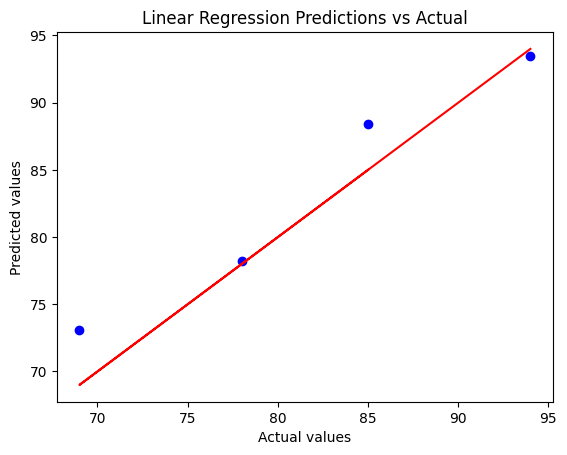

In [160]:
# Plot outputs
import matplotlib.pyplot as plt

plt.scatter(y_test, prediction, color='blue')  # Scatter plot for predictions vs actual
plt.plot(y_test, y_test, color='red')      # Perfect prediction line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression Predictions vs Actual')
plt.show()

### Task 1. 
- Draw a linear regression line through the dataset `datasets/w5-simple-regression-trainset.xlsx`. Please note: the excel file contains data only in `Sheet1`. **Using Scikit-learn library allowed.**

In [135]:
df = pd.read_excel('datasets/w5-simple-regression-trainset.xlsx')
df.head()

,x,y
0,1,76
1,2,78
2,2,85
3,4,88
4,2,72


In [136]:
shuffled_data = df.sample(frac=1)
shuffled_data.head()

,x,y
14,3,82
5,1,69
17,2,83
11,3,75
8,2,88


In [137]:
X = shuffled_data[['x']]
y = shuffled_data[['y']]
X

,x
14,3
5,1
17,2
11,3
8,2
10,4
4,2
7,4
6,5
18,1


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [139]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=X_train,y=y_train)

LinearRegression()

In [140]:
beta_1 = model.coef_
beta_0 = model.intercept_
print(f'The regression model is y = {beta_1}x + {beta_0}')

The regression model is y = [[5.10569106]]x + [67.97560976]


In [141]:
prediction = model.predict(X_test)

Text(0, 0.5, 'y')

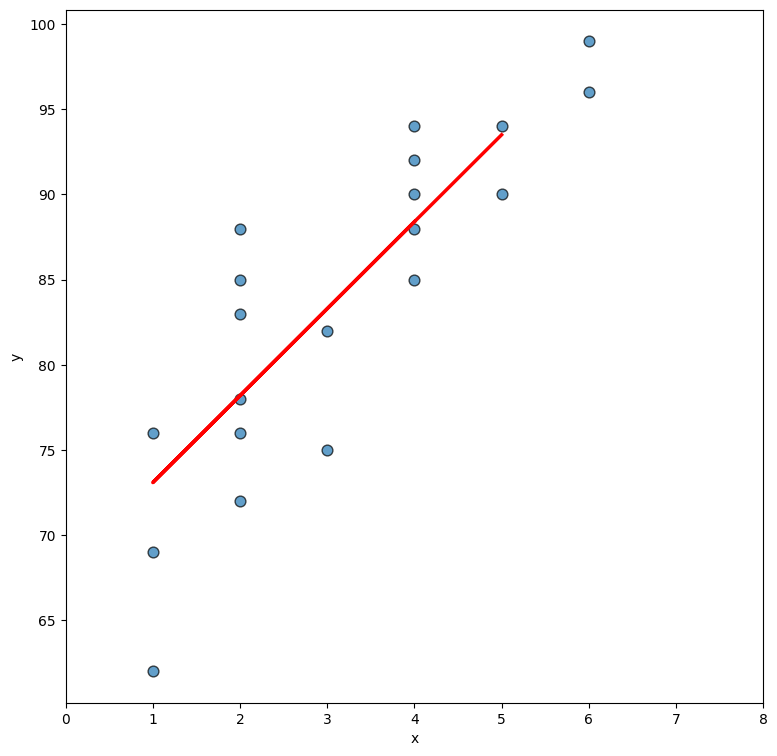

In [143]:
# Plot outputs

import matplotlib.pyplot as plt
# initialize layout 
fig, ax = plt.subplots(figsize=(9,9))

# add scatterplot
ax.scatter(X,y, s=60, alpha=0.7, edgecolors='k')
plt.xlim([0,8])

# generate x-axis points 
# plot regression line (red)
ax.plot(X_test, prediction, color='red', lw=2.5)
plt.xlabel('x')
plt.ylabel('y')

In [161]:
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, prediction))}')
print(f"R2_score = {r2_score(y_test,prediction)}")

RMSE = 2.6686550687069657
R2_score = 0.9154692002880074


### Task 2. 
- Draw polynomial regression lines of degree 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100 through the dataset. Evaluate each of the models (including the model in #1) on the test set `dataset/w5-simple-testset.xlsx` in terms of RMSE and R2-score. Comments? **Using scikit-learn library allowed.**


In [144]:
df = pd.read_excel('datasets/w5-simple-regression-testset.xlsx')

In [145]:
df.head()

,x,y
0,1.5,69.00
1,2.5,80.33
2,3.5,78.50
3,4.5,89.80
4,5.5,92.00


/Users/natalienguyen/Developer/Machine Learning/venv-machine-learning/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


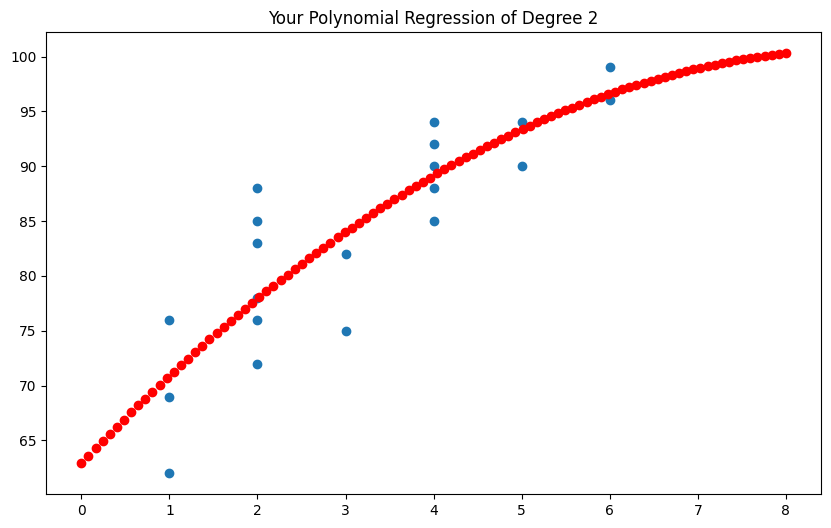

Evaluation result with degree 2
RMSE = 2.30721366392603 
R2_score = 0.9368162030741012


/Users/natalienguyen/Developer/Machine Learning/venv-machine-learning/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


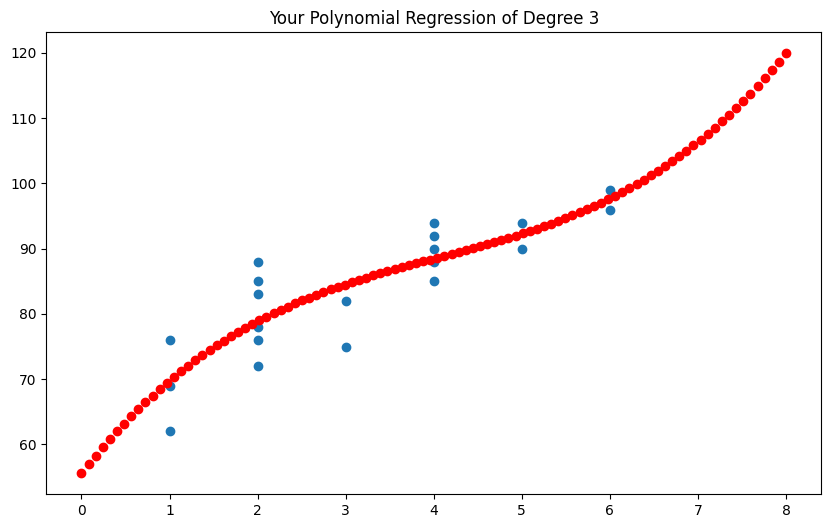

Evaluation result with degree 3
RMSE = 2.0169079147229 
R2_score = 0.9517161123267434


/Users/natalienguyen/Developer/Machine Learning/venv-machine-learning/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


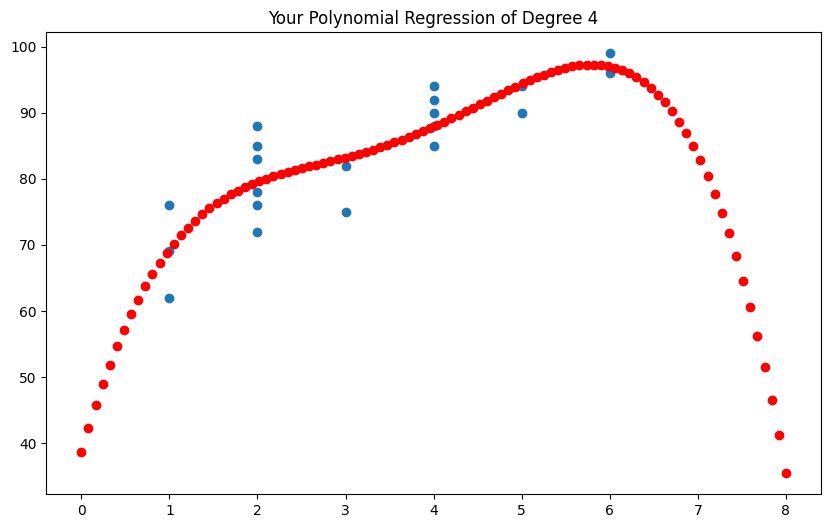

Evaluation result with degree 4
RMSE = 1.6599614022291438 
R2_score = 0.9672941025888363


/Users/natalienguyen/Developer/Machine Learning/venv-machine-learning/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


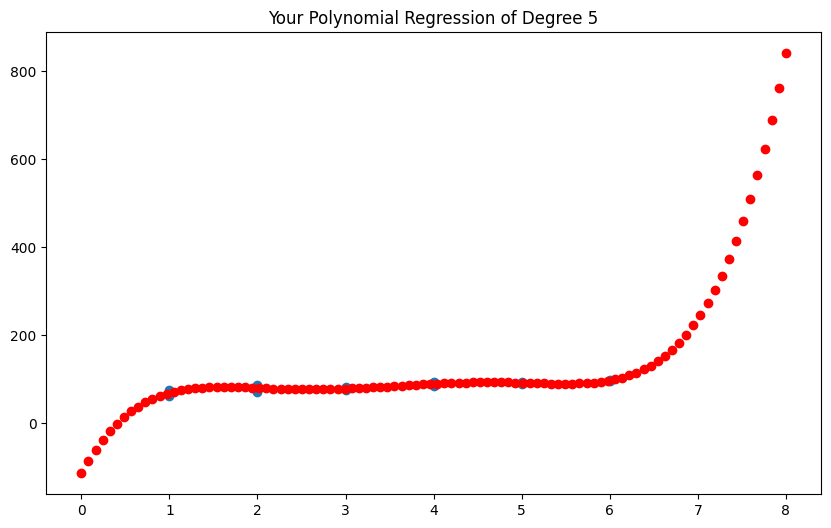

Evaluation result with degree 5
RMSE = 2.8497563248524043 
R2_score = 0.9036069897799848


/Users/natalienguyen/Developer/Machine Learning/venv-machine-learning/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


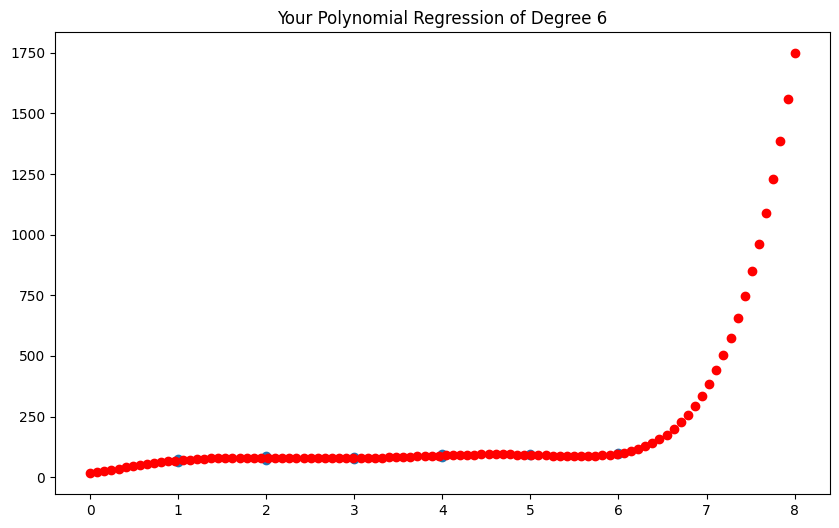

Evaluation result with degree 6
RMSE = 2.849756324871883 
R2_score = 0.903606989778667


/Users/natalienguyen/Developer/Machine Learning/venv-machine-learning/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


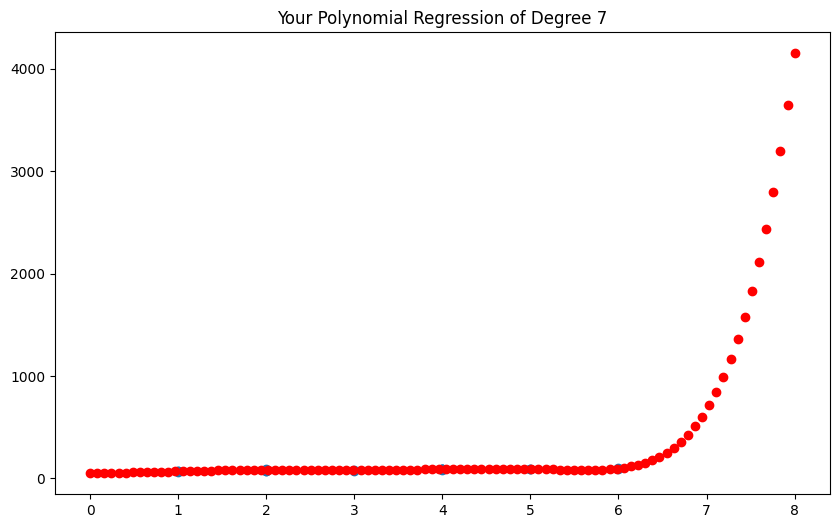

Evaluation result with degree 7
RMSE = 2.849756324937412 
R2_score = 0.903606989774234


/Users/natalienguyen/Developer/Machine Learning/venv-machine-learning/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


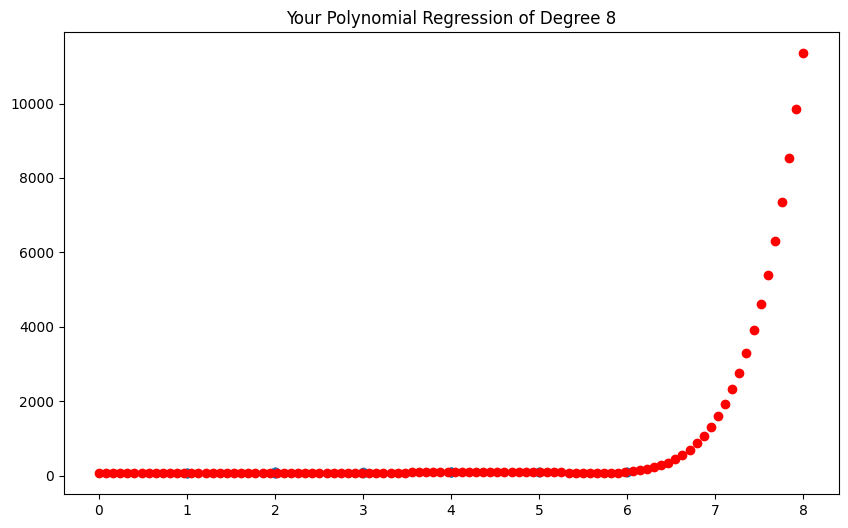

Evaluation result with degree 8
RMSE = 2.8497563248423443 
R2_score = 0.9036069897806653


/Users/natalienguyen/Developer/Machine Learning/venv-machine-learning/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


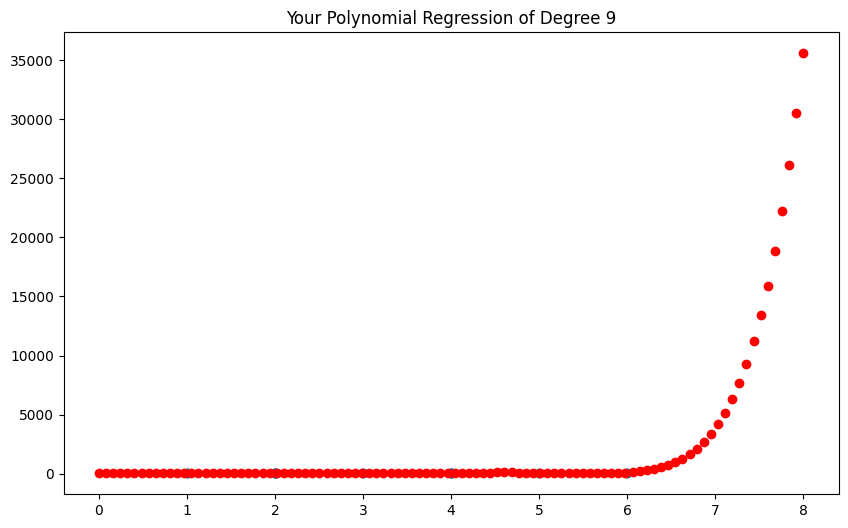

Evaluation result with degree 9
RMSE = 2.849756324942563 
R2_score = 0.9036069897738855


/Users/natalienguyen/Developer/Machine Learning/venv-machine-learning/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


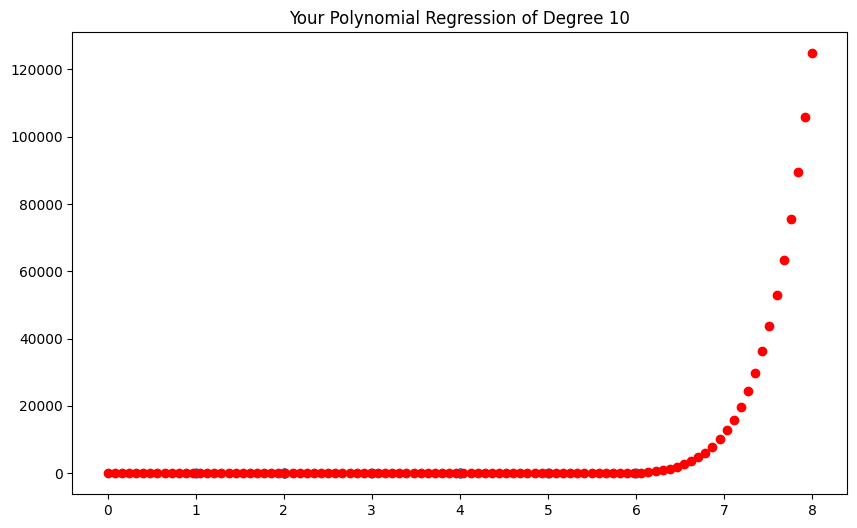

Evaluation result with degree 10
RMSE = 2.8497563252048073 
R2_score = 0.9036069897561447


/Users/natalienguyen/Developer/Machine Learning/venv-machine-learning/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


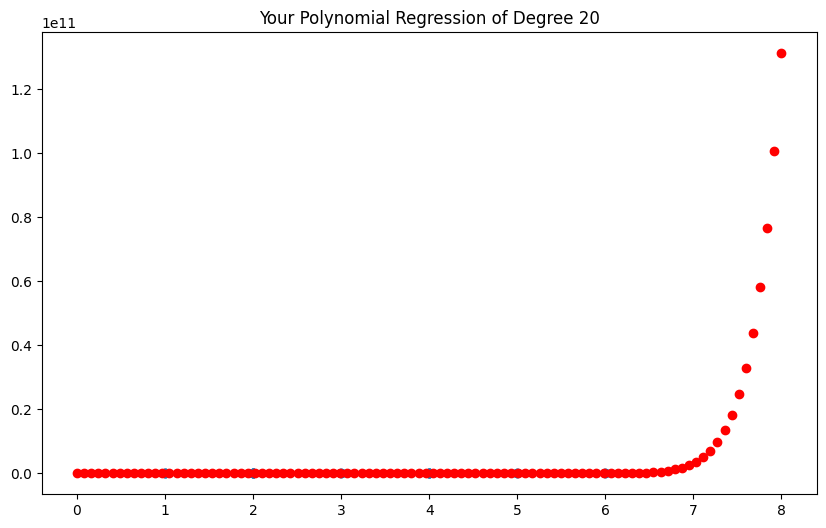

Evaluation result with degree 20
RMSE = 2.8497567999902764 
R2_score = 0.9036069576369042


/Users/natalienguyen/Developer/Machine Learning/venv-machine-learning/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


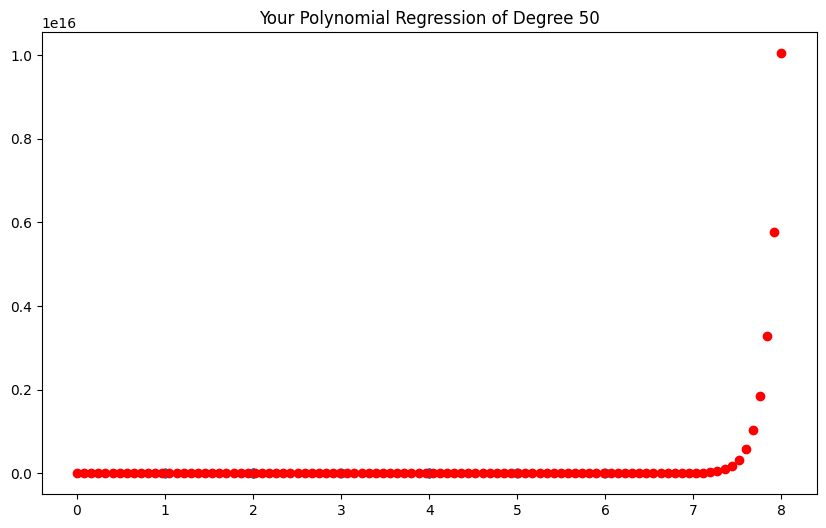

Evaluation result with degree 50
RMSE = 4.764025077762389 
R2_score = 0.730612048171526


/Users/natalienguyen/Developer/Machine Learning/venv-machine-learning/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


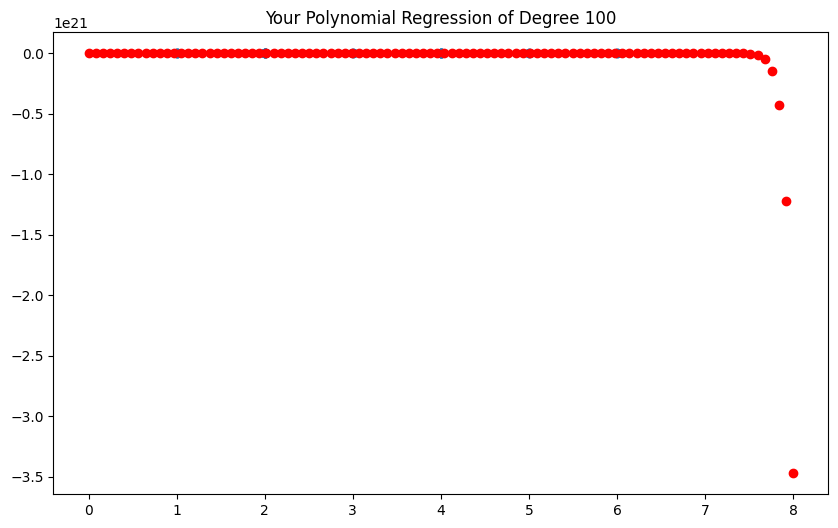

Evaluation result with degree 100
RMSE = 6.550509863993052 
R2_score = 0.49069223171192555


In [146]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]


for degree in degrees: 
    poly = PolynomialFeatures(degree=degree, include_bias=False)

    poly_train_x = poly.fit_transform(X)
    poly_test_x = poly.transform(X_test)

    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_train_x, y)

    testset_x_seq = np.linspace(0,8,100).reshape(-1,1) # for regression line plotting
    testset_x_seq_poly = poly.transform(testset_x_seq)

    y_predicted = poly_reg_model.predict(testset_x_seq_poly)
    # Make predictions on the test set
    predicted = poly_reg_model.predict(poly_test_x)

    plt.figure(figsize=(10,6))
    plt.title(f"Your Polynomial Regression of Degree {degree}")
    plt.scatter(X,y)
    plt.scatter(testset_x_seq,y_predicted, c='red')
    plt.show()

    print(f"Evaluation result with degree {degree}")
    print(f"RMSE = {np.sqrt(mean_squared_error(y_test,predicted))} ")
    print(f"R2_score = {r2_score(y_test,predicted)}")

### Task 3.
-  **Using scikit-learn library NOT ALLOWED**: Assuming you have gone through regression model lecture slides `Week-04-05--Regression-ML-Fall2024.pdf`. Build a simple linear regression model with the same `dataset/w5-simple-regression-trainset.xlsx` dataset in `Sheet1` with the following methods: i) closed form solution, ii) batch gradient descent, iii) stochastic gradient descent, iv) mini-batch gradient descent. And, compare your results with the evaluation metrics you got in #2.
   - For methods (ii)-(iv) vary value of learning rate and save all evaluation metrics.
   - For methods (iv) vary batch size and save all evaluation metrics.


### Task 5. 
-  Now, do the same as in task #4 without scikit-learn library. Apply the 4 solution approaches: (i) closed-form solution, (ii) batch gradient descent, (iii) stochastic gradient descent, (iv) mini-batch gradient descent. Don't forget to tune the *hyper-parameters* like learning rate.. Compare with results obtained in task #4.

**Task 6**: Piggybacking on Task 4 where scikit-learn library usage is allowed: solve using [scikit-learn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and train the Pipeline with `dataset/w5-multi-regression-trainset.xlsx` and evaluate the pipeline with `dataset/w5-multi-regression-testset.xlsx` in terms of RMSE and R2-score.

**Task 7**: Repeat task 6 with the `scikit-learn Pipeline` but apply one of your custom regressor from task 5.

**Task 8**: Plot $y=f(x) = x^2-5x+5$, Optimize (i.e., minimize) the function: solve $x$ such that $y$ has the minimum value. Test if the solution changes if $y$ is halved; i.e., $y = \dfrac{1}{2}(x^2-5x+5)$.


**Task 9**: Repeat task 8 with $y = f(x) = -x^2+4x+3$. Also, check if the solution changes if $y$ is doubled, i.e., $y = 2(-x^2+4x+3) = -2x^2+8x+6$.


**Task 10**: Repeat task 8 with $y = f(x) = x \log x$. Also, check if the solution changes if $y$ is negated, i.e., $y = -x\log x$.

In [147]:
import numpy as np
import matplotlib.pyplot as plt

In [148]:
x = np.linspace(-3,3,100)
y = x*np.log(x)

/var/folders/_2/0wh94zd11cj6smgr_57jgfyc0000gn/T/ipykernel_19097/3961859206.py:2: RuntimeWarning: invalid value encountered in log
  y = x*np.log(x)


(-3.0, 3.0)

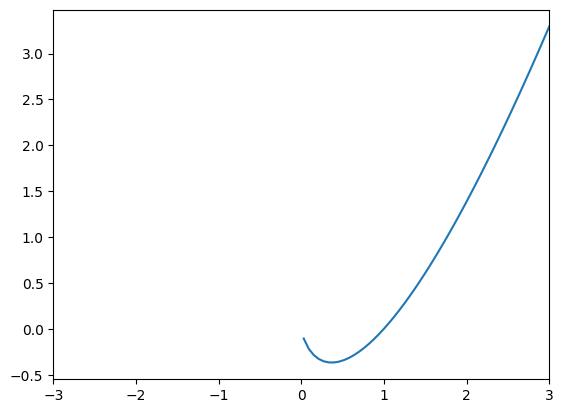

In [149]:
plt.plot(x,y)
plt.xlim([-3,3])

**Task 11**: Given $A = \begin{bmatrix}3 & 0 & 2\\2 & 0 & -2\\0 & 1 & 1\end{bmatrix}$. i) compute its inverse, i.e., $A^{-1}$. ii) Check if $AA^{-1} = A^{-1}A = I$. ii) compute its trace, i.e., $\text{tr}(A)$.

In [150]:
import numpy as np
A = np.matrix([[3,0,2], [2,0,-2], [0,1,1]])
A

matrix([[ 3,  0,  2],
        [ 2,  0, -2],
        [ 0,  1,  1]])

In [151]:
A_inv  = np.linalg.inv(A)
A_inv

matrix([[ 0.2,  0.2,  0. ],
        [-0.2,  0.3,  1. ],
        [ 0.2, -0.3, -0. ]])

In [152]:
np.dot(A,A_inv)

matrix([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-5.55111512e-17,  1.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [153]:
np.trace(A)

np.int64(4)

In [154]:
# tranpose A
# flip the row to columnsS
A.T

matrix([[ 3,  2,  0],
        [ 0,  0,  1],
        [ 2, -2,  1]])

**Task 12**: Given $P = \begin{bmatrix}3 & 0 & 2\end{bmatrix}$, and $Q = \begin{bmatrix}1 & 2 & 3 & 4\\5 & 6 & 7 & 8\\9 & 10 & 11 & 12\end{bmatrix}$, and $R = \begin{bmatrix}2 & 1\\1 & -3 \\4 & 1\\1 & -5\end{bmatrix}$, and $S = \begin{bmatrix}1\\2\end{bmatrix}$,  i) compute $PQRS$, ii) compute $\text{tr}(PQRS)$, iii) check if $\text{tr}(PQRS) = \text{tr}(QRSP) = \text{tr}(RSPQ) = \text{tr}(SPQR)$

**Task 13**: Given $A = \begin{bmatrix}1 & 2 & 3\\4 & 5 & 6\\7&8&9\end{bmatrix}$, $B = \begin{bmatrix}10 & 11 & 12\\13 & 14 & 15\\16&17&18\end{bmatrix}$, and $C = \begin{bmatrix}19 & 20 & 21\\22 & 23 & 24\\25 & 26 & 27\end{bmatrix}$, 
* i) compute $\text{tr}(A+B+C)$,
* ii) check if true: $\text{tr}(A+B+C) = tr(A) + tr(B) + tr(C)$,
* iii) check if true: $\text{tr}(3A) = 3\text{tr}(A)$,
* iv) check if true: $\text{tr}(B) = \text{tr}(B^T)$
* v) check if true: $(ABC)^T = C^TB^TA^T$
* vi) check if true: $(A+B+C)^T = A^T + B^T + C^T$

## Drawing a simple contour plot

In [155]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)




In [156]:
x.shape, y.shape, X.shape, Y.shape

((240,), (160,), (160, 240), (160, 240))

$z = e^{-x^2-y^2} - e^{-(x-1)^2-(y-1)^2}$

In [157]:
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2




Text(0, 0.5, 'y')

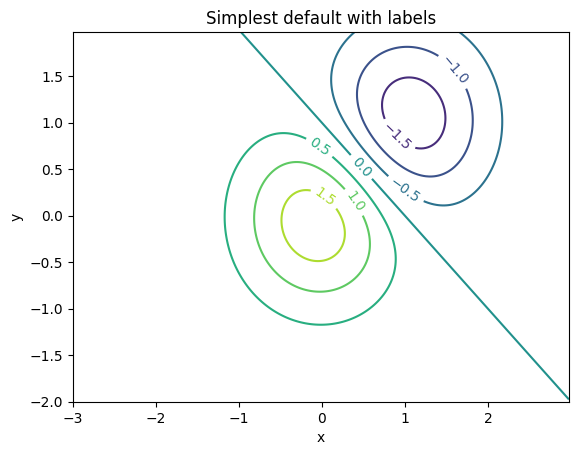

In [158]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')
ax.set_xlabel('x')
ax.set_ylabel('y')